# CASE STUDY ON UNSUPERVISED LEARNING

.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [4]:
wine=pd.read_csv(r"C:\Users\hp\Desktop\Wine_clust.csv")
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EDA

In [5]:
wine.shape

(178, 13)

In [6]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

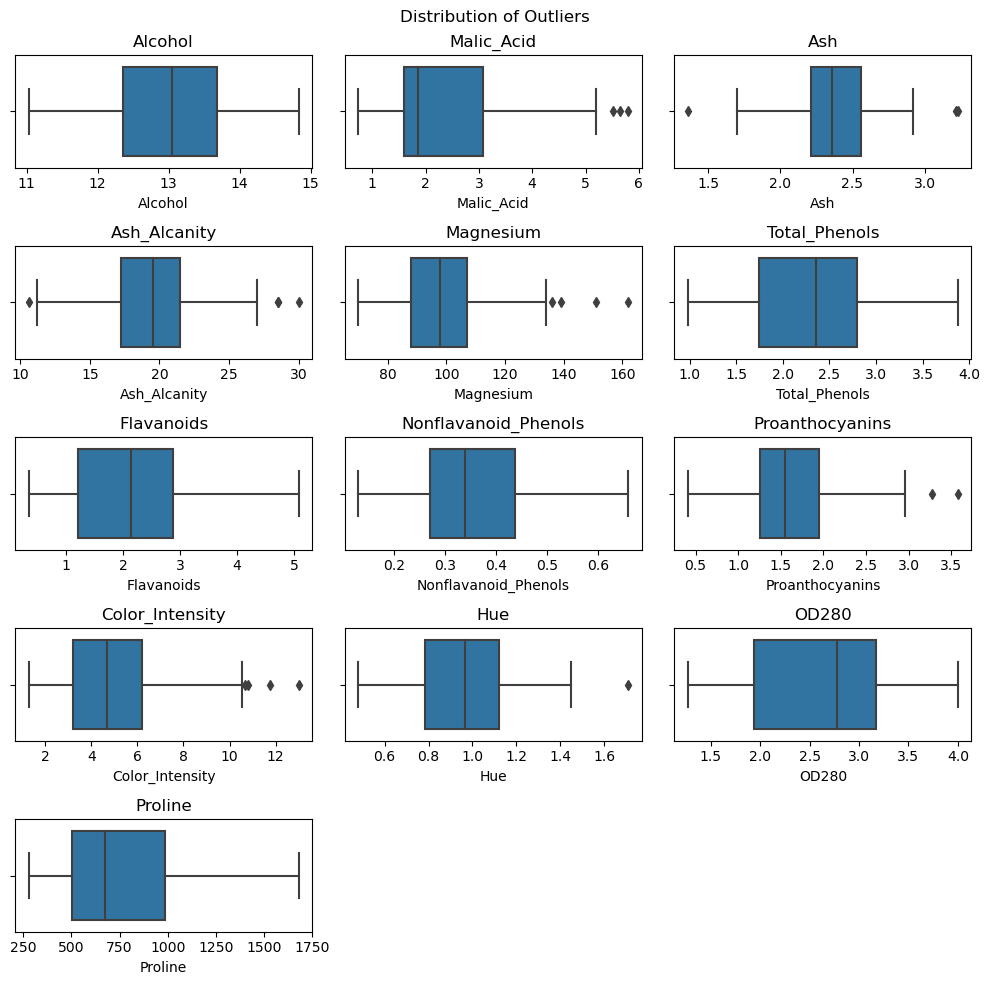

In [9]:
k=1
plt.figure(figsize=(10,10))
plt.suptitle('Distribution of Outliers')

for i in wine:
    plt.subplot(5,3,k)
    sns.boxplot(x=i,data=wine)
    plt.title(i)
    plt.tight_layout()
    k+=1

Very few outliers, so we are skipping the outlier handling part.

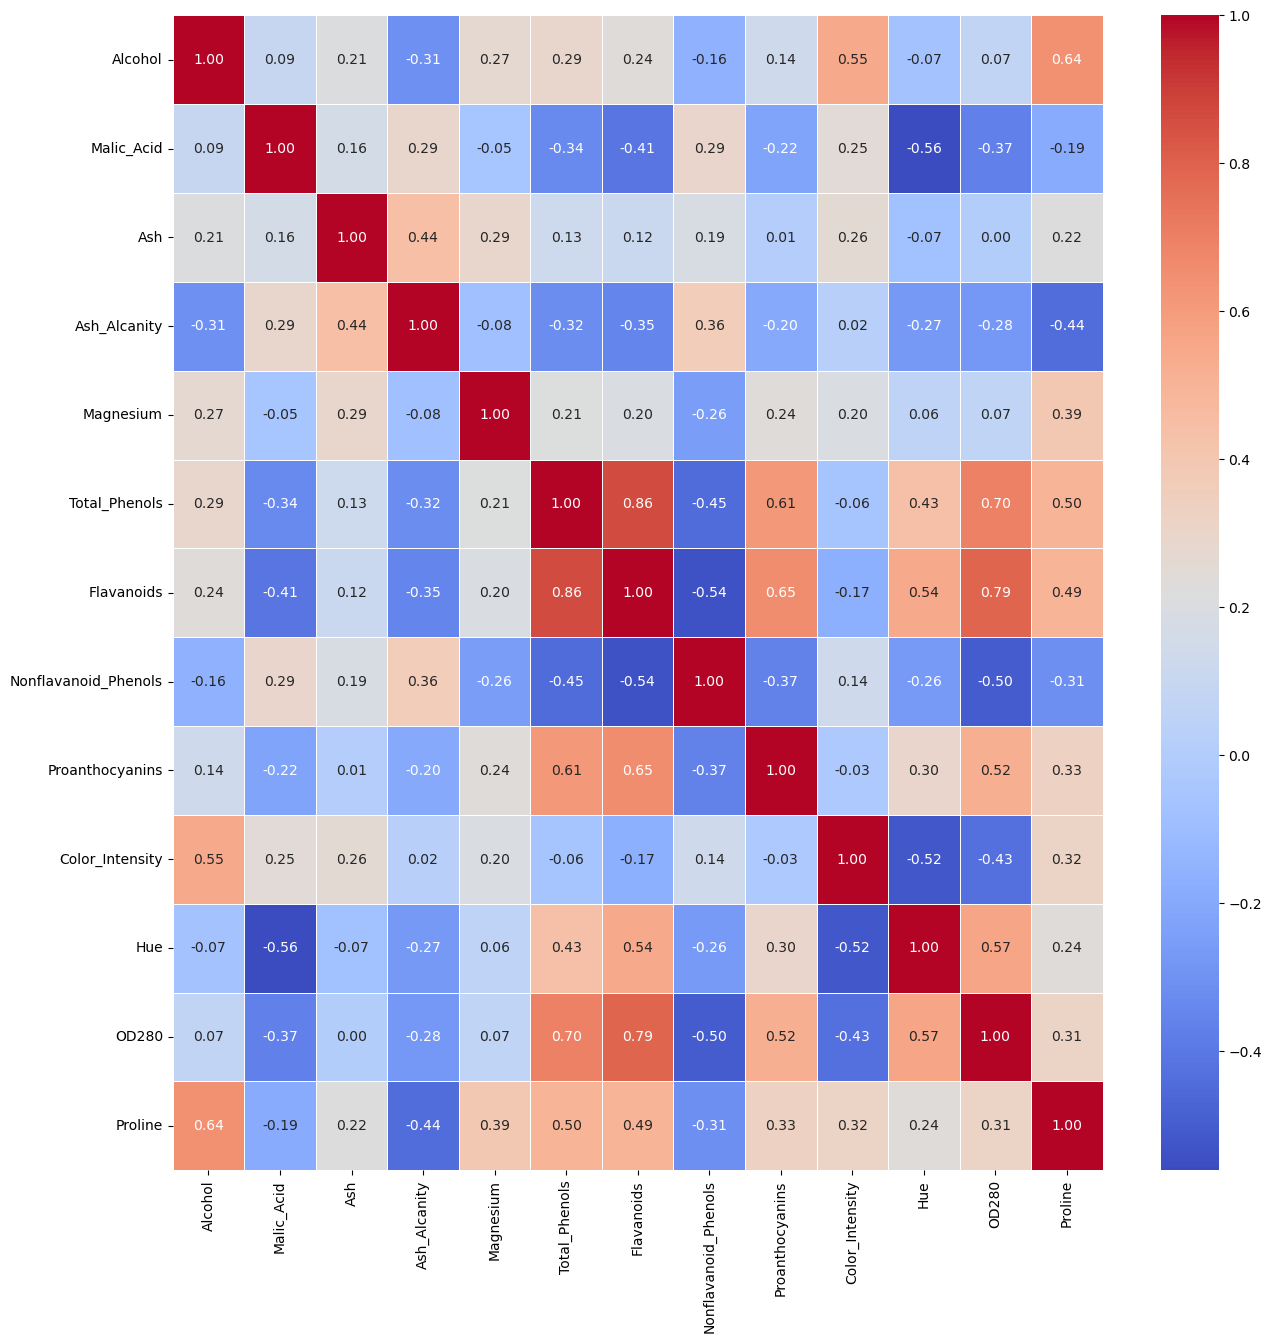

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(wine.corr(),annot=True,fmt='.2f',linewidths=0.7,cmap='coolwarm')
plt.show()

We observe high correlation between Flavanoids and Total_Phenols. So we are going to drop either one of these two.

# Preprocessing

In [11]:
wine.drop('Flavanoids',axis=1,inplace=True)
wine.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,3.40,1050


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
wine1=scaler.fit_transform(wine)
wine1=pd.DataFrame(wine1,columns=wine.columns)
wine1.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


# Optimum Clusters

(i) K-Means

.#

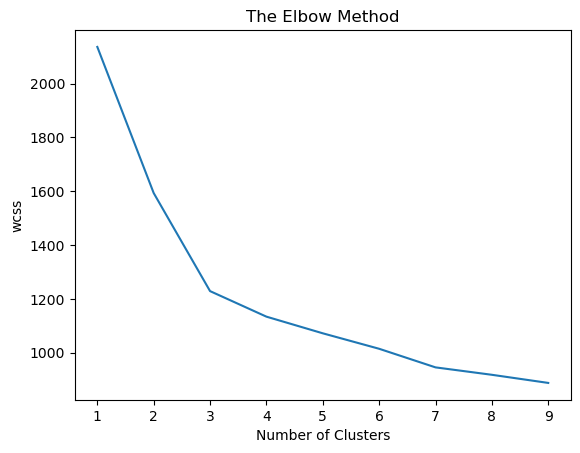

In [13]:
wcss=[]
for i in range (1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(wine1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
!pip install yellowbrick

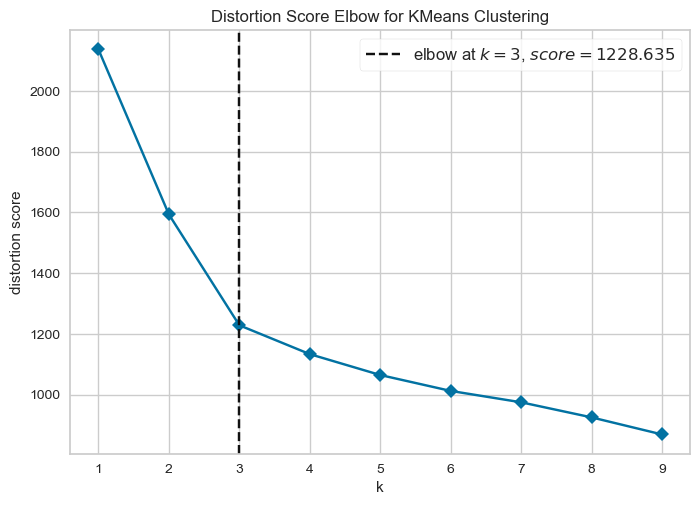

In [15]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,10),timings=False)
visualizer.fit(wine1)
visualizer.poof()
plt.show()

Optimum number of clusters = 3

.#

(ii) Hierarchial Cluster

.#

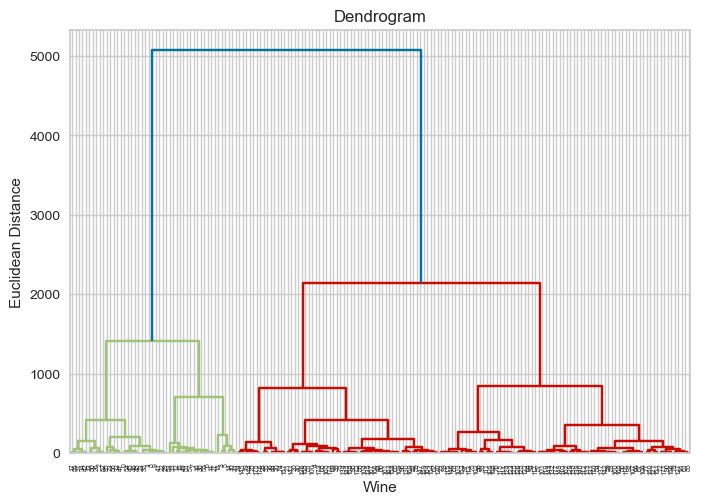

In [18]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(wine,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean Distance')
plt.show()

Optimum number of clusters = 3

.#

(iii) Silhouette Score

.#

In [19]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(wine)
    score=silhouette_score(wine,kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))

For cluster: 2, the silhouette score is: 0.6568652359906426
For cluster: 3, the silhouette score is: 0.5711769978108682
For cluster: 4, the silhouette score is: 0.5606458844290398
For cluster: 5, the silhouette score is: 0.5490707650047961
For cluster: 6, the silhouette score is: 0.5639497755596163
For cluster: 7, the silhouette score is: 0.5622672867814715
For cluster: 8, the silhouette score is: 0.5364950717112533
For cluster: 9, the silhouette score is: 0.5309121852983751


Optimum number of clusters = 3

# Creating Final Model

In [20]:
pca=PCA()
X=pca.fit_transform(wine)
np.sum(pca.explained_variance_ratio_)

1.0000000000000002

In [21]:
kmeans=KMeans(n_clusters=3)
label=kmeans.fit_predict(X)
unique_labels=np.unique(label)

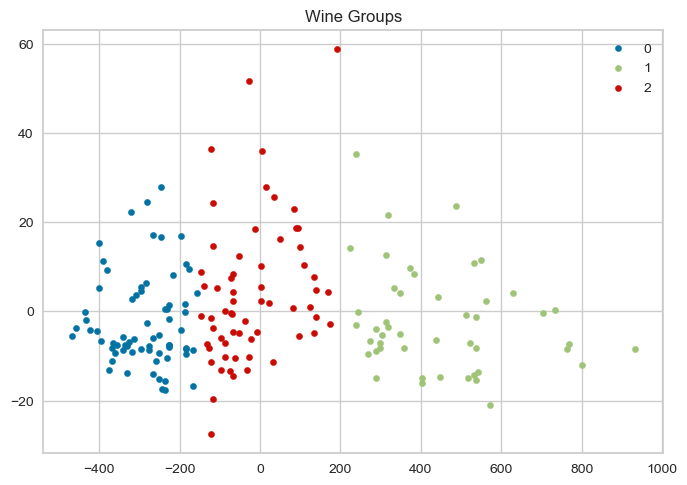

In [22]:
for i in unique_labels:
    plt.scatter(X[label==i,0], X[label==i,1], label=i,s=20)
    
plt.legend()
plt.title('Wine Groups')
plt.show()

# DB Scan Clustering

In [29]:
neighbors=NearestNeighbors(n_neighbors=4)
neighbors_fit=neighbors.fit(wine1)
distances,indices=neighbors_fit.kneighbors(wine1)

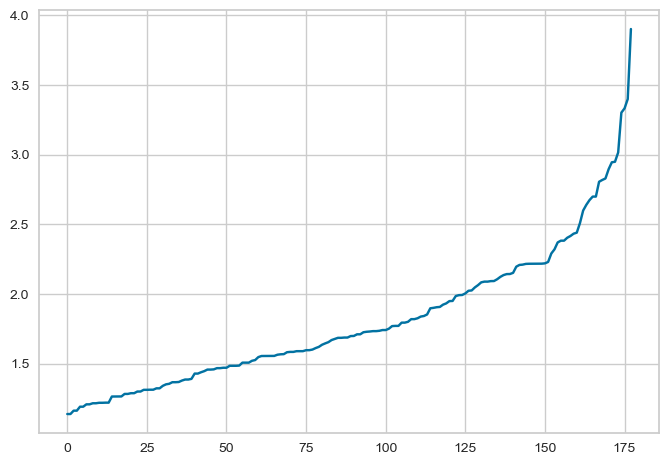

In [30]:
#finding epsilon value

distances=np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [32]:
dbscan=DBSCAN(eps=2.3, metric='euclidean', min_samples=4) 

In [35]:
model1=dbscan.fit(wine1)
label1=model1.labels_
np.unique(label1)

array([-1,  0,  1], dtype=int64)

In [43]:
label1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1,  0,  0,  0,  0, -1,  0,
       -1, -1, -1, -1,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0,  0,  1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [36]:
sample_cores=np.zeros_like(label1,dtype=bool)

In [37]:
sample_cores[dbscan.core_sample_indices_]=True

In [40]:
n_clusters=len(set(label1)) - (1 if -1 in label1 else 0)
n_noise=list(label1).count(-1)
s=metrics.silhouette_score(wine1,label1)

In [41]:
print('Estimated number of clusters:%d'%n_clusters)
print('Estimated number of noise points:%d'%n_noise)
print(f'Silhouette Coefficient:{s:.2f}')

Estimated number of clusters:2
Estimated number of noise points:35
Silhouette Coefficient:0.19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


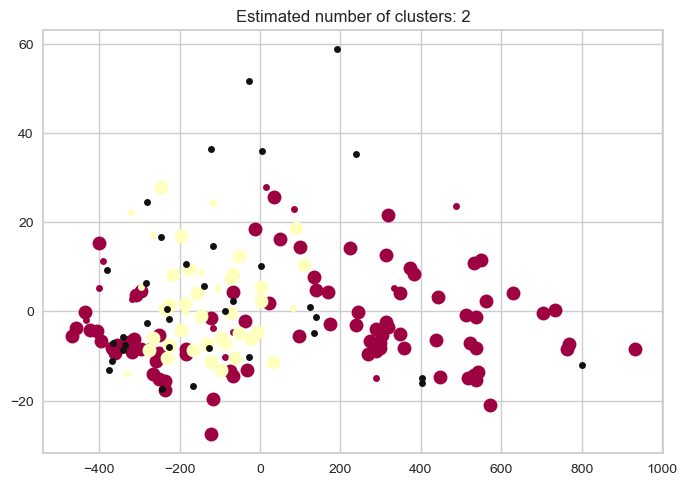

In [46]:
unique_labels = set(label1)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = 'k'
    
    class_member_mask = (label1 == k)
    xy = X[class_member_mask & sample_cores]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
    markeredgecolor='k', markersize=10)
    xy = X[class_member_mask & ~sample_cores]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
    markeredgecolor='k', markersize=5)
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.legend()
plt.show()